In [8]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Investment Risk and Return

## Returns

What is Risk?
- Risk in financial markets is a measure of uncertainty. It is the dispersion or variance of financial returns.

How do you typically measure risk?
- Standard deviation or variance of daily returns
- Kurtosis of the daily returns distribution
- Skewness of the daily returns distribution

Discrete returns and Log returns:
<img src='images/discrete_returns.png' width=300/> <img src='images/log_returns.png' width=300/>


In [3]:
StockPrices = pd.read_csv('MSFTPrices.csv', parse_dates=['Date'])
StockPrices = StockPrices.sort_values(by='Date')
StockPrices.head(5)

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


This file included daily Open, High, Low, Close, Adjusted Close, and Volume data, often referred to as **OHLCV data**.

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. Adjusted close price is used to calculate the returns of the stock.

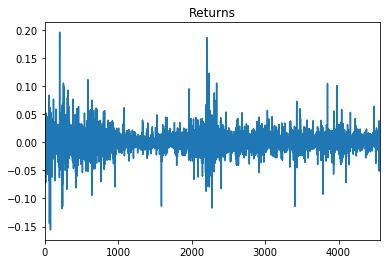

In [4]:
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
StockPrices['Returns'].plot(title='Returns')
plt.show()

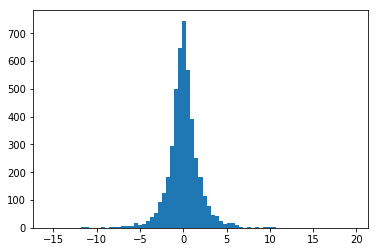

In [5]:
percent_return = StockPrices['Returns']*100
plt.hist(percent_return.dropna(), bins=75)
plt.show()

## Average Returns and Volatility

Moments of Distributions:
1. Mean
2. Variance
3. Skewness
4. Kurtosis


- Normal distributions have a skewness near 0 and a kurtosis near 3.
- Financial returns tend not to be normally distributed.
- Financial returns can have high kurtosis.

<img src='images/ibm_vs_gaussian_dist.png' width=400 />

Note the difference in kurtosis between IBM and Gaussian distribution.

But what use are daily return estimates to a long-term investor? You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days (252) in a year:
To get annual average return, do NOT simply multiple daily avg. return with no. of trading days in a year.

<img src='images/scale_avg_return.png' width=500 />

<img src='images/scaled_volatility.png' width=400 />

In [6]:
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

mean_return_annualized = ((1 + mean_return_daily) ** 252) - 1
print(mean_return_annualized)

0.00037777546435757725
0.09985839482858783


In [13]:
sigma_daily = np.std(StockPrices['Returns'])
print(f'Daily std. deviation is {sigma_daily}')

variance_daily = sigma_daily ** 2
print(f'Daily variance is {variance_daily}')

sigma_annualized = sigma_daily * np.sqrt(252)
print(f'Annualized std. deviation is {sigma_annualized}')

variance_annualized = sigma_annualized ** 2
print(f'Annualized variance is {variance_annualized}')

Daily std. deviation is 0.019341100408708328
Daily variance is 0.0003740781650197374
Annualized std. deviation is 0.3070304505826317
Annualized variance is 0.09426769758497383


## Skewness and Kurtosis

<img src='images/skewness.png' width=300/>
In finance, you would tend to want positive skewness

Skewness can be calculated using `scipy.stats.skew`.

Kurtosis is a measure of the thickness of the tails of a distribution.

Most financial returns are leptokurtic. 

Leptokurtic: When a distribution has positive excess kurtosis (kurtosis greater than 3)

Excess Kurtosis: Subtract 3 (kurtosis of gaussian dist.) from the sample kurtosis to calculate “Excess Kurtosis”

<img src='images/ibm_kurtosis.png' width=300/>

<u>Excess</u> Kurtosis can be calculated using `scipy.stats.kurtosis`. Excess kurtosis greater than 0 suggests non-normality.


How do you perform a statistical test for normality?
The null hypothesis of the **Shapiro-Wilk** test is that the data are normally distributed.

To run the Shapiro-Wilk normality test in Python:
```
from scipy import stats
p_value = stats.shapiro(StockData["Returns"].dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")
```

The `shapiro` function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value.

In [15]:
# Calculate the third moment (skewness) of the returns distribution
returns_skewness = sts.skew(StockPrices['Returns'].dropna())
print(returns_skewness)

0.21935459193067852


In [17]:
# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = sts.kurtosis(StockPrices['Returns'].dropna())
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

10.31457261802553
13.31457261802553


In [19]:
# Run the Shapiro-Wilk test on the stock returns
shapiro_results = sts.shapiro(StockPrices['Returns'].dropna())
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: (0.9003633260726929, 0.0)
P-value:  0.0


Since the p-value is less than 0.05, we reject the null hypothesis, at 95% significance level, that the data is normally distributed.

# Portfolio Investing

## Portfolio Returns

<img src='images/portfolio_return.png' width=300 />

`CumulativeReturns = ((1+StockReturns).cumprod()-1)`

<img src='images/market_cap_weighted_portfolio.png' width=300 />

In [54]:
StockReturns = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'], index_col='Date')

In [55]:
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [56]:
asset_names = StockReturns.columns

In [57]:
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

In [58]:
WeightedReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.000342,0.001062,0.000558,0.000273,0.000980,0.000507,0.000313,0.002203,0.001843
2017-01-04,-0.000134,-0.000671,-0.000880,-0.000082,0.000166,0.000466,0.000035,0.002192,-0.000930
2017-01-05,0.000610,0.000000,-0.001193,0.000523,-0.000828,0.003073,-0.000625,0.002335,-0.000449
2017-01-06,0.001338,0.001300,-0.000045,-0.000240,0.000010,0.001991,0.000314,0.003179,-0.003188
2017-01-09,0.001099,-0.000477,-0.001320,-0.000009,0.000063,0.000117,-0.000522,0.001690,-0.002014


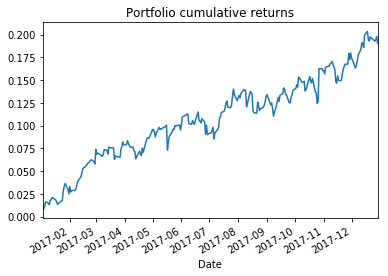

In [59]:
# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = (1 + StockReturns["Portfolio"]).cumprod() - 1
CumulativeReturns.plot(title='Portfolio cumulative returns')
plt.show()

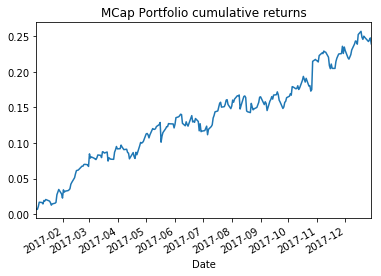

In [60]:
# Market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

mcap_weights = market_capitalizations / np.sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = (1 + StockReturns["Portfolio_MCap"]).cumprod() - 1
CumulativeReturns.plot(title='MCap Portfolio cumulative returns')
plt.show()

## Portfolio Volatility

<img src='images/portfolio_volatility.png' width=300 />

`portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))`

In [35]:
StockReturns = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'], index_col='Date')
returns_corr_matrix = StockReturns.corr()
returns_corr_matrix

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328,0.052781,0.067930,0.079391,0.091622
JPM,0.199914,0.191248,0.305926,0.070328,1.000000,0.013919,0.257401,0.095245,0.252832
AMZN,0.509472,0.621096,0.015118,0.052781,0.013919,1.000000,-0.092188,0.653030,-0.017909
GE,0.006766,-0.044827,0.193861,0.067930,0.257401,-0.092188,1.000000,-0.024364,0.292706
FB,0.542367,0.543341,-0.046813,0.079391,0.095245,0.653030,-0.024364,1.000000,-0.024505
T,0.005082,-0.021079,0.197576,0.091622,0.252832,-0.017909,0.292706,-0.024505,1.000000


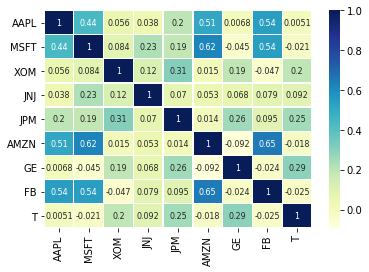

In [36]:
# Create a heatmap
sns.heatmap(
    returns_corr_matrix,
    annot=True,
    cmap="YlGnBu", 
    linewidths=0.3,
    annot_kws={"size": 8}
)

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [38]:
returns_cov_matrix = StockReturns.cov()
annual_returns_cov_matrix = returns_cov_matrix * 252

In [40]:
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])
portfolio_annual_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(annual_returns_cov_matrix, portfolio_weights)))
print(portfolio_annual_volatility)

0.08931417642713807


## Modern Portfolio Theory

- Efficient Frontier
- Maximum Sharpe Ratio portfolio (MSR)
- Global Minimum Volatility portfolio (GMV)
- Maximum Return portfolio: Portfolio with maximum return, irrespective of risk.
- Tangency portfolio
- Capital allocation line

<img src='images/efficient_frontier.png' width=300 />
<img src='images/tangency_portfolio.png' width=300 />
<img src='images/capital_allocation_line.jpeg' width=300 />

In [62]:
random_portfolios = pd.read_csv('EfficientFrontierPortfoliosSlim.csv')

In [63]:
random_portfolios.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


In [64]:
risk_free_rate = 0  # Assumption for the sake of simplicity
random_portfolios['sharpe'] = (random_portfolios['Returns'] - risk_free_rate) / random_portfolios['Volatility'] 

print(random_portfolios['sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: sharpe, dtype: float64


Performance of MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

In [77]:
numstocks = len(asset_names)

# Sort the portfolios by Sharpe ratio
MSR_weights = np.array(random_portfolios.sort_values(by=['sharpe'], ascending=False).iloc[0, :numstocks])
GMV_weights = np.array(random_portfolios.sort_values(by=['Volatility'], ascending=True).iloc[0, :numstocks])

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, :numstocks].mul(MSR_weights, axis=1).sum(axis=1)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, :numstocks].mul(GMV_weights, axis=1).sum(axis=1)

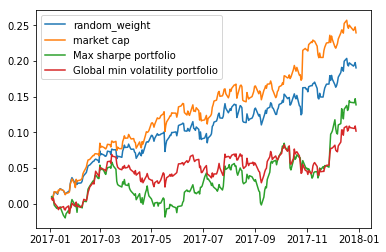

In [79]:
cum_returns_random = (1 + StockReturns["Portfolio"]).cumprod() - 1
cum_returns_mcap = (1 + StockReturns["Portfolio_MCap"]).cumprod() - 1
cum_returns_msr = (1 + StockReturns["Portfolio_MSR"]).cumprod() - 1
cum_returns_gmv = (1 + StockReturns["Portfolio_GMV"]).cumprod() - 1

_ = plt.plot(cum_returns_random, label='random_weight')
_ = plt.plot(cum_returns_mcap, label='market cap')
_ = plt.plot(cum_returns_msr, label='Max sharpe portfolio')
_ = plt.plot(cum_returns_gmv, label='Global min volatility portfolio')
_ = plt.legend(loc='best')
plt.show()

GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

# Factor Investing

## Capital Asset Pricing Model

In finance and economics, **systematic risk** (also called aggregate risk or undiversifiable risk) is vulnerability to events which affect aggregate outcomes such as broad market returns, total economy-wide resource holdings, or aggregate income. Systematic or aggregate risk arises from market structure or dynamics which produce shocks or uncertainty faced by all agents in the market; such shocks could arise from government policy, international economic forces, or acts of nature. In contrast, **specific risk** (sometimes called residual risk, unsystematic risk, or idiosyncratic risk) is risk to which only specific agents or industries are vulnerable (and is uncorrelated with broad market returns). Due to the idiosyncratic nature of unsystematic risk, it can be reduced or eliminated through diversification; but since all market actors are vulnerable to systematic risk, it cannot be limited through diversification (but it may be insurable). As a result, assets whose returns are negatively correlated with broader market returns command higher prices than assets not possessing this property. 


Systematic risk plays an important role in portfolio allocation. Risk which cannot be eliminated through diversification commands returns in excess of the risk-free rate (while idiosyncratic risk does not command such returns since it can be diversified). Over the long run, a well-diversified portfolio provides returns which correspond with its exposure to systematic risk; investors face a trade-off between expected returns and systematic risk. Therefore, an investor's desired returns correspond with their desired exposure to systematic risk and corresponding asset selection. Investors can only reduce a portfolio's exposure to systematic risk by sacrificing expected returns.

An important concept for evaluating an asset's exposure to systematic risk is **beta**. Since <u>beta indicates the degree to which an asset's return is correlated with broader market outcomes, it is simply an indicator of an asset's vulnerability to systematic risk.</u> Hence, the capital asset pricing model (CAPM) directly ties an asset's equilibrium price to its exposure to systematic risk.


A simple example:
Consider an investor who purchases stock in many firms from most global industries. This investor is vulnerable to systematic risk but has diversified away the effects of idiosyncratic risks on his portfolio value; further reduction in risk would require him to acquire risk-free assets with lower returns (such as U.S. Treasury securities). On the other hand, an investor who invests all of his money in one industry whose returns are typically uncorrelated with broad market outcomes (beta close to zero) has limited his exposure to systematic risk but, due to lack of diversification, is highly vulnerable to idiosyncratic risk. 


In finance, the beta of an investment is a measure of the risk arising from exposure to general market movements as opposed to idiosyncratic factors (systemic risk).

The market portfolio of all investable assets has a beta of exactly 1. A beta below 1 can indicate either an investment with lower volatility than the market, or a volatile investment whose price movements are not highly correlated with the market.An example of the first is a treasury bill: the price does not fluctuate significantly, so it has a low beta. An example of the second is gold. The price of gold fluctuates significantly, but not in the same direction or at the same time as the market.
A beta greater than 1 generally means that the asset both is volatile and tends to move up and down with the market. An example is a stock in a big technology company. Negative betas are possible for investments that tend to go down when the market goes up, and vice versa. There are few fundamental investments with consistent and significant negative betas, but some derivatives like put options can have large negative betas.

**Security Market Line**

<img src='images/capm_1.png' width=300 />
<img src='images/SML-chart.png' width=300 />
<img src='images/systmatic_risk.gif' width=300 />

References:
https://analystprep.com/study-notes/frm/part-1/foundations-of-risk-management/the-capital-asset-pricing-model/
https://en.wikipedia.org/wiki/Security_market_line
https://en.wikipedia.org/wiki/Systematic_risk
https://en.wikipedia.org/wiki/Beta_(finance)


In [2]:
FamaFrenchData = pd.read_csv('FamaFrenchFactors.csv')

In [3]:
FamaFrenchData.head()

,Date,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
0,2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
1,2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2,2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
3,2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
4,2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


In [4]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

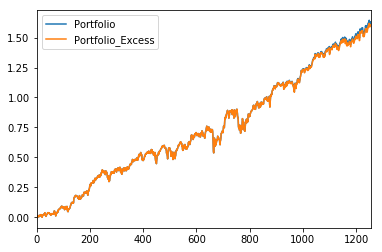

In [5]:
# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

<img src="images/beta_as_var_ratio.png" width=300/>

r<sub>a</sub> is the return of the asset, r<sub>b</sub> is return of the benchmark. 

In [7]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

5.726126338154974e-05
5.8803350882118946e-05
0.9737755165745473


Since beta is 0.97, for every 1.0% rise (or fall) in the market, we can expect the portfolio to rise (fall) roughly 0.97%

In [10]:
# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

0.7942627160017837


In [14]:
beta = CAPM_fit.params.loc['Market_Excess']
print(beta)

0.9737755165745478


## Fama French Model


<img src='images/fama_french_1.png' width=400/>

https://en.wikipedia.org/wiki/Fama%E2%80%93French_three-factor_model

In [15]:
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

FamaFrench_fit = FamaFrench_model.fit()

regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585149


Note that adjusted R2 is much larger than the one obtained by CAPM model.

In [18]:
FamaFrench_fit.params

Intercept        0.000183
Market_Excess    1.015498
SMB             -0.262152
HML             -0.108657
dtype: float64

Note that the coefficients for SMB and HML are both negative.

In [19]:
FamaFrench_fit.pvalues

Intercept        6.904127e-02
Market_Excess    0.000000e+00
SMB              1.520051e-33
HML              4.699308e-07
dtype: float64

The alpha (α) left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:
- The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
- There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.


In [20]:
# Calculate your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1 + portfolio_alpha) ** 252) - 1
print(portfolio_alpha_annualized)

0.00018326665203183447
0.04726181730280854


The 5-factor model

In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:

    RMW: Profitability
    CMA: Investment

The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative

In [21]:
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225789


Note that this adjusted R2 is larger than the one obtained by CAPM and Fama-French 3 factor model.

# Value at Risk

## Drawdown

<img src='images/drawdown.png'/>

In [52]:
# Cumulative returns of USO (ETF that tracks oil)
daily_rets = pd.read_csv('USO.csv', parse_dates=['Date'], index_col='Date')

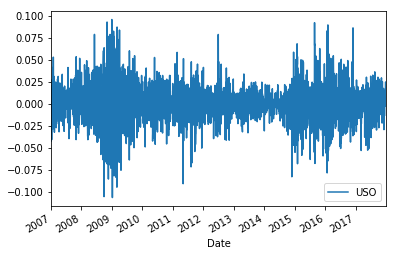

In [53]:
daily_rets.plot()

In [54]:
cum_rets = (1 + daily_rets).cumprod() - 1

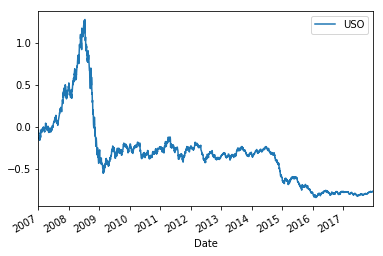

In [55]:
cum_rets.plot()

In [56]:
# Calculate the running maximum
running_max = np.maximum.accumulate(cum_rets)

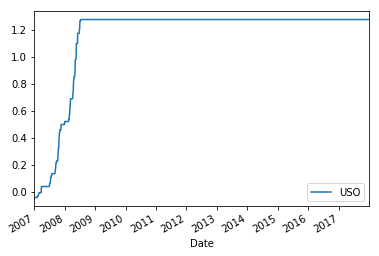

In [57]:
running_max.plot()

In [58]:
# Ensure the value never drops below 1
running_max[running_max < 1] = 1

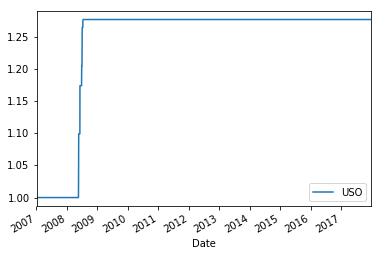

In [59]:
running_max.plot()

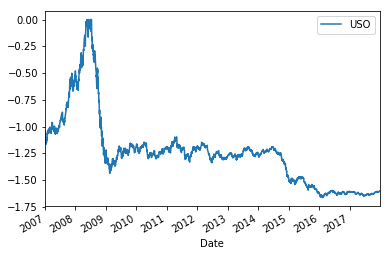

In [60]:
# Calculate the percentage drawdown
drawdown = ((cum_rets)/running_max) - 1

drawdown.plot()
plt.show()

Notice how the drawdown never goes above 0 (as opposed to the previous plot)? That's because a positive drawdown isn't a drawdown at all - its a gain